In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt


import seaborn as sns
sns.set()
sns.set_style("white")


import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
import xgboost

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score


Using TensorFlow backend.


In [2]:
df = pd.read_csv('Test_Set.csv')
df.head(87)

,account_id,week_start_date,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,Label
0,105049,2018-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,105049,2018-09-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,105049,2018-09-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,105049,2018-09-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,105049,2018-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,105049,2019-11-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
83,105049,2019-11-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
84,105049,2019-12-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
85,105049,2019-12-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [3]:
df.isnull().any()
df['Label'].value_counts()

0    29343
1      277
Name: Label, dtype: int64

In [4]:
df['account_id'].value_counts()

103253    252
100444    234
101699    200
106103    198
108940    180
         ... 
239722      1
101532      1
101669      1
107023      1
239793      1
Name: account_id, Length: 713, dtype: int64

In [5]:
from datetime import datetime
 
year = lambda x: datetime.strptime(x, "%Y-%m-%d" ).year
df['year'] = df['week_start_date'].map(year)
month = lambda x: datetime.strptime(x, "%Y-%m-%d" ).month
df['month'] = df['week_start_date'].map(month)
day = lambda x: datetime.strptime(x, "%Y-%m-%d" ).day
df['day'] = df['week_start_date'].map(day)


In [6]:
df1=df.copy()
df1['week_start_date']= pd.to_datetime(df['week_start_date'])
df1['days_sincelast_event'] = df1.groupby('account_id')['week_start_date'].diff().apply(lambda x: x.days)
df1['Week_Number'] = df1['week_start_date'].dt.week
# dropping ALL duplicte values 
df1.drop_duplicates(subset =["account_id","week_start_date" ],
                     keep = 'first', inplace = True) 

df1=df1.sort_values(by=['account_id', 'week_start_date'],ascending=True)
df1.head(25)


,account_id,week_start_date,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature59,feature60,feature61,feature62,Label,year,month,day,days_sincelast_event,Week_Number
26115,100010,2019-10-07,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0,2019,10,7,NaN,41
26116,100010,2019-10-14,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0,2019,10,14,7.0,42
26117,100010,2019-10-21,0.000000,0.0,3.666667,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0,2019,10,21,7.0,43
26118,100010,2019-10-28,0.000000,0.0,0.392857,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0,2019,10,28,7.0,44
26119,100010,2019-11-04,0.000000,0.0,-0.846154,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0,2019,11,4,7.0,45
26120,100010,2019-11-11,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0,2019,11,11,7.0,46
26121,100010,2019-11-18,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0,2019,11,18,7.0,47
26122,100010,2019-11-25,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0,2019,11,25,7.0,48
26123,100010,2019-12-02,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0,2019,12,2,7.0,49
26124,100010,2019-12-09,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0,2019,12,9,7.0,50


In [7]:
df1.reset_index(inplace=True)
def func(x,year):
    init=pd.to_datetime('2018-09-03')
    if(year==2018):
        return x.isocalendar()[1]-init.isocalendar()[1]
    elif(year==2019):
        z=x.isocalendar()[1]
        return z+16
    elif(year==2020):
        return x.isocalendar()[1]+68
    

df1['weeks'] = df1.apply(lambda row : func(row['week_start_date'], 
                     row['year']), axis = 1) 
#df1['weeks']=df1['week_start_date'].map(func)
df1['id'] = df1.index
df1.head(24)

,index,account_id,week_start_date,feature1,feature2,feature3,feature4,feature5,feature6,feature7,...,feature61,feature62,Label,year,month,day,days_sincelast_event,Week_Number,weeks,id
0,26115,100010,2019-10-07,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0,2019,10,7,NaN,41,57,0
1,26116,100010,2019-10-14,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0,2019,10,14,7.0,42,58,1
2,26117,100010,2019-10-21,0.000000,0.0,3.666667,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0,2019,10,21,7.0,43,59,2
3,26118,100010,2019-10-28,0.000000,0.0,0.392857,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0,2019,10,28,7.0,44,60,3
4,26119,100010,2019-11-04,0.000000,0.0,-0.846154,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0,2019,11,4,7.0,45,61,4
5,26120,100010,2019-11-11,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0,2019,11,11,7.0,46,62,5
6,26121,100010,2019-11-18,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0,2019,11,18,7.0,47,63,6
7,26122,100010,2019-11-25,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0,2019,11,25,7.0,48,64,7
8,26123,100010,2019-12-02,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0,2019,12,2,7.0,49,65,8
9,26124,100010,2019-12-09,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0,2019,12,9,7.0,50,66,9


In [8]:
df1['days_sincelast_event']=df1['days_sincelast_event'].fillna(-1)
def func2(w,z):
    if z !=-1:
        return df1.loc[w-1,'Label']
    else:
        
        return -1
    

df1['one_week_prior_label'] = df1.apply(lambda row : func2(row['id'],row['days_sincelast_event']), axis = 1) 
df1['hack_1']=df1['days_sincelast_event'].copy()

def func3(w,z):
    if z !=-1:
        return w
        
    else:
        df1.loc[w+1,'hack_1']=-1
        return w
    

df1['hack_for_gettng_2_week_prior_value']=df1.apply(lambda row : func3(row['id'],row['days_sincelast_event']), axis = 1) 


def func4(w,z):
    if z !=-1:
        if(w-2 <0):
            return -2
        return df1.loc[w-2,'Label']
    else:
        
        return -2
    

df1['two_week_prior_label'] = df1.apply(lambda row : func4(row['id'],row['hack_1']), axis = 1) 

df1.head(24)


,index,account_id,week_start_date,feature1,feature2,feature3,feature4,feature5,feature6,feature7,...,month,day,days_sincelast_event,Week_Number,weeks,id,one_week_prior_label,hack_1,hack_for_gettng_2_week_prior_value,two_week_prior_label
0,26115.0,100010.0,2019-10-07,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,10.0,7.0,-1.0,41.0,57.0,0.0,-1.0,-1.0,0.0,-2.0
1,26116.0,100010.0,2019-10-14,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,10.0,14.0,7.0,42.0,58.0,1.0,0.0,-1.0,1.0,-2.0
2,26117.0,100010.0,2019-10-21,0.000000,0.0,3.666667,0.0,0.0,0.000000,0.000000,...,10.0,21.0,7.0,43.0,59.0,2.0,0.0,7.0,2.0,0.0
3,26118.0,100010.0,2019-10-28,0.000000,0.0,0.392857,0.0,0.0,0.000000,0.000000,...,10.0,28.0,7.0,44.0,60.0,3.0,0.0,7.0,3.0,0.0
4,26119.0,100010.0,2019-11-04,0.000000,0.0,-0.846154,0.0,0.0,0.000000,0.000000,...,11.0,4.0,7.0,45.0,61.0,4.0,0.0,7.0,4.0,0.0
5,26120.0,100010.0,2019-11-11,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,11.0,11.0,7.0,46.0,62.0,5.0,0.0,7.0,5.0,0.0
6,26121.0,100010.0,2019-11-18,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,11.0,18.0,7.0,47.0,63.0,6.0,0.0,7.0,6.0,0.0
7,26122.0,100010.0,2019-11-25,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,11.0,25.0,7.0,48.0,64.0,7.0,0.0,7.0,7.0,0.0
8,26123.0,100010.0,2019-12-02,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,12.0,2.0,7.0,49.0,65.0,8.0,0.0,7.0,8.0,0.0
9,26124.0,100010.0,2019-12-09,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,12.0,9.0,7.0,50.0,66.0,9.0,0.0,7.0,9.0,0.0


In [9]:
df1.columns

Index(['index', 'account_id', 'week_start_date', 'feature1', 'feature2',
       'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8',
       'feature9', 'feature10', 'feature11', 'feature12', 'feature13',
       'feature14', 'feature15', 'feature16', 'feature17', 'feature18',
       'feature19', 'feature20', 'feature21', 'feature22', 'feature23',
       'feature24', 'feature25', 'feature26', 'feature27', 'feature28',
       'feature29', 'feature30', 'feature31', 'feature32', 'feature33',
       'feature34', 'feature35', 'feature36', 'feature37', 'feature38',
       'feature39', 'feature40', 'feature41', 'feature42', 'feature43',
       'feature44', 'feature45', 'feature46', 'feature47', 'feature48',
       'feature49', 'feature50', 'feature51', 'feature52', 'feature53',
       'feature54', 'feature55', 'feature56', 'feature57', 'feature58',
       'feature59', 'feature60', 'feature61', 'feature62', 'Label', 'year',
       'month', 'day', 'days_sincelast_event', 'Week_

In [10]:
df1=df1.drop(['index', 'account_id', 'week_start_date','hack_1', 'hack_for_gettng_2_week_prior_value','id','days_sincelast_event'], axis=1)
#df1=df1.drop(['index', 'account_id', 'week_start_date','hack_1', 'hack_for_gettng_2_week_prior_value','id','days_sincelast_event','year','day','month'], axis=1)

In [11]:
df1.columns

Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'feature7', 'feature8', 'feature9', 'feature10', 'feature11',
       'feature12', 'feature13', 'feature14', 'feature15', 'feature16',
       'feature17', 'feature18', 'feature19', 'feature20', 'feature21',
       'feature22', 'feature23', 'feature24', 'feature25', 'feature26',
       'feature27', 'feature28', 'feature29', 'feature30', 'feature31',
       'feature32', 'feature33', 'feature34', 'feature35', 'feature36',
       'feature37', 'feature38', 'feature39', 'feature40', 'feature41',
       'feature42', 'feature43', 'feature44', 'feature45', 'feature46',
       'feature47', 'feature48', 'feature49', 'feature50', 'feature51',
       'feature52', 'feature53', 'feature54', 'feature55', 'feature56',
       'feature57', 'feature58', 'feature59', 'feature60', 'feature61',
       'feature62', 'Label', 'year', 'month', 'day', 'Week_Number', 'weeks',
       'one_week_prior_label', 'two_week_prior_label'],

In [12]:
df1.tail()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature61,feature62,Label,year,month,day,Week_Number,weeks,one_week_prior_label,two_week_prior_label
26951,0.0,0.0,-0.5,0.0,0.0,0.0,0.0,0.0,1.25,0.0,...,0.0,0.0,0.0,2020.0,3.0,30.0,14.0,82.0,0.0,0.0
26952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,2020.0,3.0,30.0,14.0,82.0,-1.0,-2.0
26953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,2020.0,3.0,30.0,14.0,82.0,-1.0,-2.0
26954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,2020.0,3.0,30.0,14.0,82.0,-1.0,-2.0
26955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.0


In [13]:
df1.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26955 entries, 0 to 26954
Data columns (total 70 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   feature1              26955 non-null  float64
 1   feature2              26955 non-null  float64
 2   feature3              26955 non-null  float64
 3   feature4              26955 non-null  float64
 4   feature5              26955 non-null  float64
 5   feature6              26955 non-null  float64
 6   feature7              26955 non-null  float64
 7   feature8              26955 non-null  float64
 8   feature9              26955 non-null  float64
 9   feature10             26955 non-null  float64
 10  feature11             26955 non-null  float64
 11  feature12             26955 non-null  float64
 12  feature13             26955 non-null  float64
 13  feature14             26955 non-null  float64
 14  feature15             26955 non-null  float64
 15  feature16          

In [16]:
y_test=df1['Label']
df1=df1.drop(['Label'],axis=1)

In [17]:
X_test, X_holdout, y_test, y_holdout = train_test_split(df1, y_test, test_size=0.001 ,random_state=17)


In [25]:
f=open('xgboost.pkl','rb')
xgb_clf= pickle.load(f)
f.close()
xgb_clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=17,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [26]:
import pickle
### load model

f=open('tree.pkl','rb')
tree= pickle.load(f)
f.close()
tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=17, splitter='best')

In [30]:
tree_pred = tree.predict(X_test)
xgb_pred=xgb_clf.predict(X_test)


In [31]:
from sklearn.metrics import accuracy_score
print('Accuracy of our Decision Tree Model:',accuracy_score(y_test, tree_pred))# 0.94
print('Accuracy of XgBoost Model:',accuracy_score(y_test,xgb_pred))

Accuracy of our Decision Tree Model: 0.9953208556149733
Accuracy of XgBoost Model: 0.9953208556149733


In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

Test Data Accuracy:     1.00
[[26675     4]
 [  122   127]]


Precision:              0.97
Recall:                 0.51


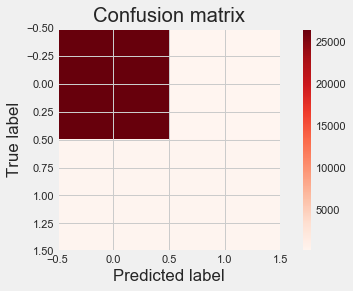

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#y_tr=np.ravel(y_tr)
test_acc=xgb_clf.score(X_test, y_test)

#print("Training Data Accuracy: %0.2f" %(train_acc))
print("Test Data Accuracy:     %0.2f" %(test_acc))
    
y_true = y_test
y_pred = xgb_clf.predict(X_test)


conf = confusion_matrix(y_true, y_pred)
print(conf)

print ('\n')
print ("Precision:              %0.2f" %(conf[1, 1] / (conf[1, 1] + conf[0, 1])))
print ("Recall:                 %0.2f"% (conf[1, 1] / (conf[1, 1] + conf[1, 0])))
    
cm=confusion_matrix(y_true, y_pred, labels=[0, 1])
    
plt.figure()
plot_confusion_matrix(cm)

In [39]:
probs = xgb_clf.predict_proba(X_test)
probs.shape

(26928, 2)

In [ ]:
probs = probs[:, 1]
probs.shape

AUC: 0.917


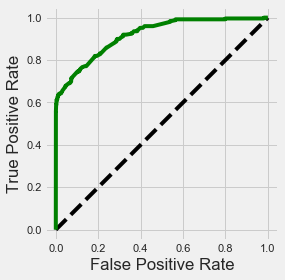

In [40]:
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
#print(fpr) #1-SPECIFICITY/PRECISION
#print(tpr) #SENSTIVITY OR RECALL
#print(thresholds)
# plot no skill
#pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
#pyplot.plot(fpr, tpr, marker='.')
# show the plot
#pyplot.show()

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1], linestyle='--', color = 'black')
plt.plot(fpr, tpr, color = 'green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.gca().set_aspect('equal', adjustable='box')

With the modelling of additional features, we can get an AUC of .917.
Thank You.
****************************************************************************